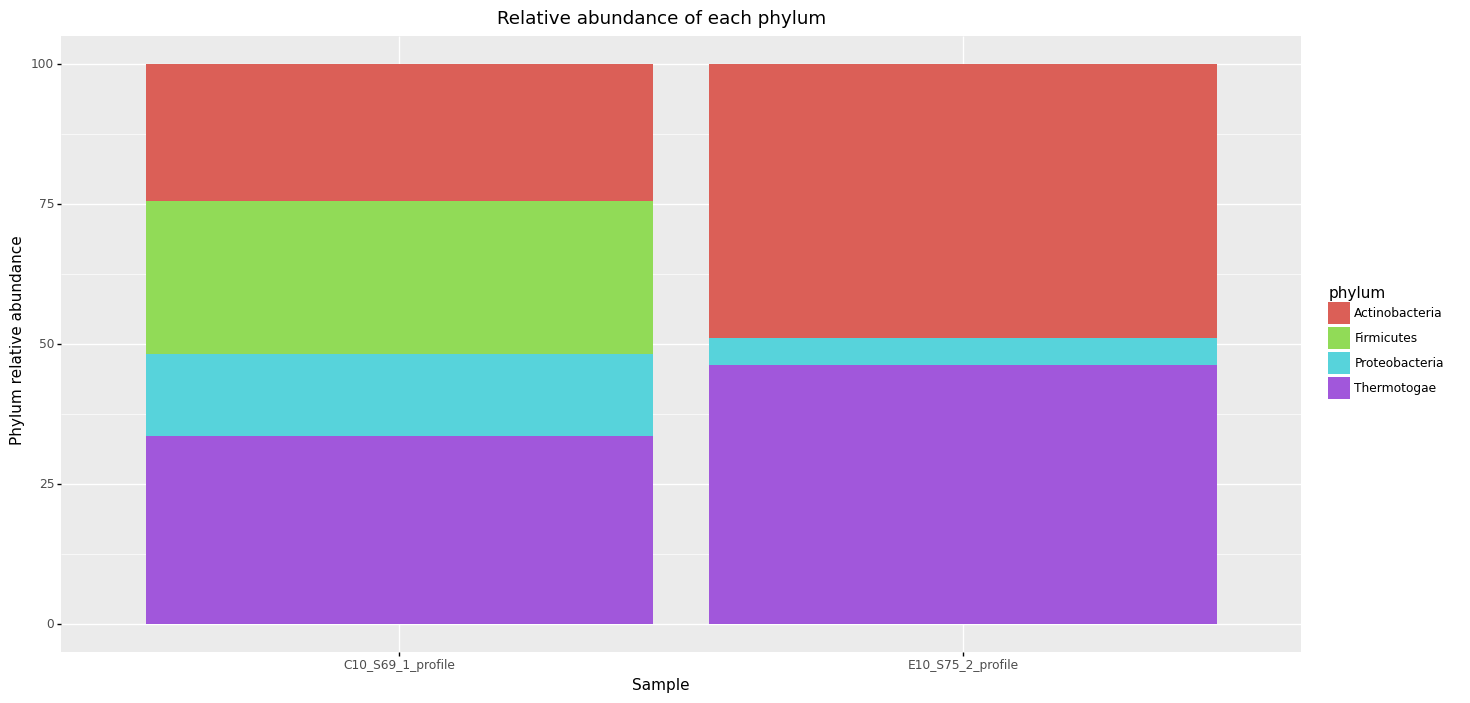

<ggplot: (8729065818308)>

In [4]:
import pandas as pd
from plotnine import *

# read metaphlan data
metaphlan_data = pd.read_csv(
    str(snakemake.input)
    # '/home/carsonjm/CarsonJM/HoffLab_MGX/02_READ_BASED_TAXONOMY/metaphlan_combined_profiles_phylum.csv'
    )
metaphlan_phyla_melt = metaphlan_data.melt(id_vars=['phylum'], value_vars=metaphlan_data.columns[3:])

# plot phylum abundances
phylum_barplot = (
    ggplot(metaphlan_phyla_melt)
    + geom_bar(aes(x='variable', y='value', fill='phylum'), stat='identity')
    + theme(figure_size=(16, 8)) 
    + labs(title='Relative abundance of each phylum')
    + ylab("Phylum relative abundance")
    + xlab("Sample")
)

# save figure to file
phylum_barplot.save(str(snakemake.output), dpi=600)
# phylum_barplot